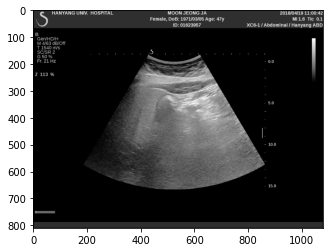

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("image.tif", cv2.IMREAD_GRAYSCALE)
colorized_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
plt.imshow(image, cmap='gray')
plt.show()

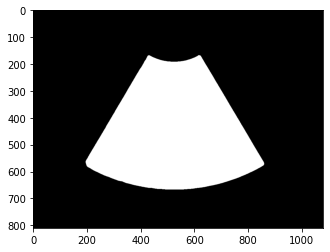

In [2]:
mask = np.zeros((image.shape[0], image.shape[1]), np.uint8)

bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

rect = (100, 100, 900, 600)
cv2.grabCut(colorized_image, mask, rect, bgdModel, fgdModel, 1, cv2.GC_INIT_WITH_RECT)

mask = np.where((mask==2) | (mask==0), 0, 1).astype('uint8')
mask = cv2.bilateralFilter(mask, 15, 75, 75)

plt.imshow(mask, cmap='gray')
plt.show()

In [3]:
x_left  = np.min(np.where(mask == 1)[0])
x_right = np.max(np.where(mask == 1)[0])
y_upper = np.min(np.where(mask == 1)[1])
y_lower = np.max(np.where(mask == 1)[1])

print(f"{x_left, y_upper} \n {x_right, y_lower}")

(168, 196) 
 (666, 860)


(500, 650)


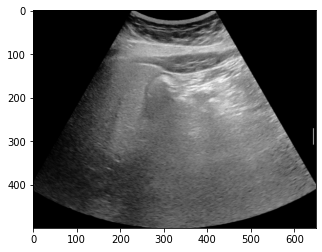

In [4]:
croped_mask = image[x_left:x_right, y_upper:y_lower]
croped_mask = cv2.resize(croped_mask, (650, 500))

print(croped_mask.shape)

plt.imshow(croped_mask, cmap='gray')
plt.show()